In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## read_csv로 데이터를 DataFrame 형태로 불러옴

In [4]:
file_path = 'data/drinks.csv'
drinks = pd.read_csv(file_path)

In [5]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


- info() 함수를 통해 결출(NaN)값을 측정

In [6]:
drinks.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [7]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [8]:
corr = drinks[['beer_servings','wine_servings']].corr(method='pearson')
print(corr)

beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [9]:
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


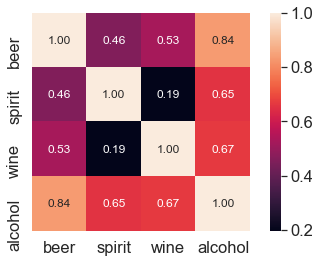

In [11]:
import seaborn as sns

# corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 12},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

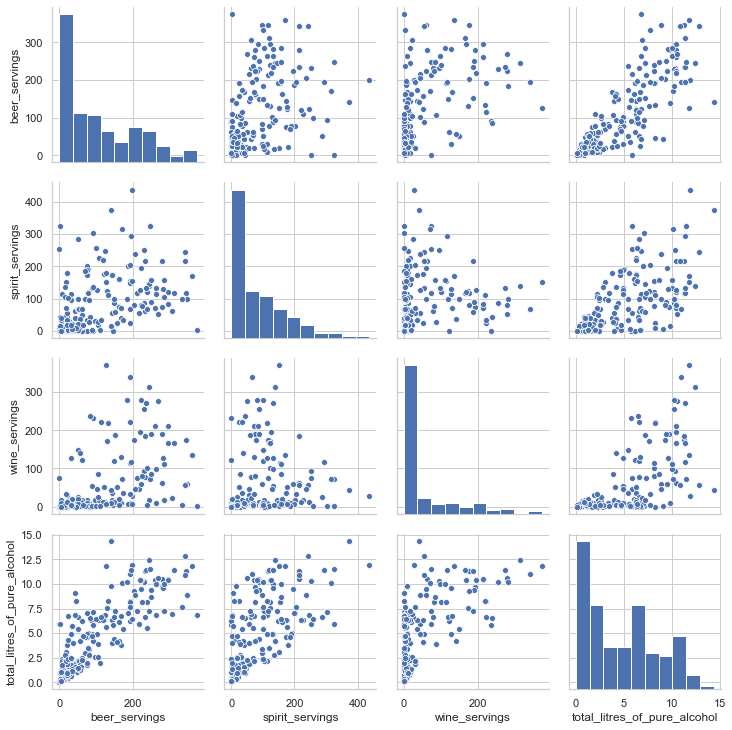

In [17]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

### 결측 데이터 전처리

In [20]:
print(drinks.isnull().sum())
print("-------------------")
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
-------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


- 결측 데이터 채우기

In [48]:
drinks['continent'] = drinks['continent'].fillna('OTHER')

In [50]:
drinks.continent = drinks.continent.fillna('OTHER')
drinks.continent.value_counts

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [13]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [14]:
print(drinks.isnull().sum())

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64


In [15]:
drinks['country'].USA = 'united'

In [251]:
drinks['country']

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
189        Vietnam
190          Yemen
191         Zambia
192       Zimbabwe
USA         united
Name: country, Length: 194, dtype: object

In [219]:
count_usa = drinks.country.['united'].count()
print(count_usa, info())

SyntaxError: invalid syntax (<ipython-input-219-cc9e132c111c>, line 1)

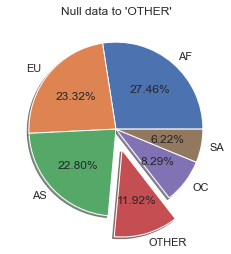

In [36]:
labels = drinks['continent'].value_counts().index.tolist() #인덱스를 리스트로 만듬
fracsl = drinks['continent'].value_counts().values.tolist()

explode = (0,0,0,0.25,0,0)
plt.pie(fracsl,explode=explode, labels=labels, autopct='%.f%%',shadow=True)
plt.title("Null data to 'OTHER'")
plt.show()

In [16]:
labels = drinks['continent'].value_counts().index.tolist()
print(labels)

['AF', 'EU', 'AS', 'OTHER', 'OC', 'SA']


In [17]:
fracsl = drinks['continent'].value_counts().values.tolist()
print(fracsl)

[53, 45, 44, 23, 16, 12]


https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

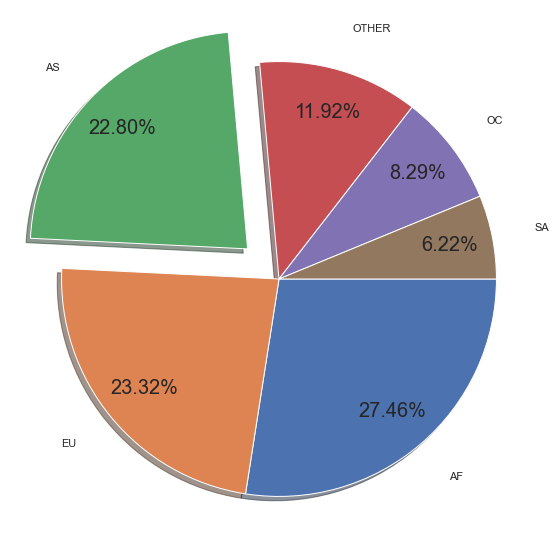

In [89]:
plt.figure(figsize=(10,10))  #이미지의 사이즈 크기 지정

####font 크기
#plt.rc('font', size=20) 
plt.rcParams.update({'font.size':20})
#####

plt.pie(fracsl, 
        explode=(0,0,0.20,0,0,0), 
        labels=labels, 
        colors=None, 
        autopct='%.2f%%', 
        pctdistance=0.8, 
        shadow=True, 
        labeldistance=1.2, 
        startangle=None, 
        radius=None, 
        counterclock=False, 
        wedgeprops=None, 
        textprops=None, 
        center=(0, 0), 
        frame=False, 
        rotatelabels=False)
plt.show()
plt.rc('font', size=10)

#### - agg 함수

In [18]:

result = drinks.groupby('continent').beer_servings.\
agg(['count','mean','median','min','max','var','std','sum']) # 줄이 바뀌는 것을 알려주기 위해서 '\'를 붙인다.
result.head()

,count,mean,median,min,max,var,std,sum
continent,,,,,,,,
AF,53,61.471698,32.0,0,376,6489.561684,80.557816,3258
AS,44,37.045455,17.5,0,247,2447.253700,49.469725,1630
EU,45,193.777778,219.0,0,361,9926.449495,99.631569,8720
OC,16,89.687500,52.5,0,306,9339.562500,96.641412,1435
OTHER,23,145.434783,143.0,1,285,6339.529644,79.621163,3345


In [19]:
result = drinks.groupby('continent').wine_servings.\
agg(['count','mean','median','min','max','var','std','sum'])
result.head()

,count,mean,median,min,max,var,std,sum
continent,,,,,,,,
AF,53,16.264151,2.0,0,233,1509.044267,38.846419,862
AS,44,9.068182,1.0,0,123,469.460359,21.667034,399
EU,45,142.222222,128.0,0,370,9490.994949,97.421738,6400
OC,16,35.625000,8.5,0,212,4167.450000,64.555790,570
OTHER,23,24.521739,11.0,1,100,798.988142,28.266378,564


In [20]:
result = drinks.groupby('continent').total_litres_of_pure_alcohol.\
agg(['count','mean','median','min','max','var','std','sum']) # 줄이 바뀌는 것을 알려주기 위해서 '\' 역슬래쉬를 붙인다.
result.head()

,count,mean,median,min,max,var,std,sum
continent,,,,,,,,
AF,53,3.007547,2.30,0.0,9.1,7.009557,2.647557,159.4
AS,44,2.170455,1.20,0.0,11.5,7.674223,2.770239,95.5
EU,45,8.617778,10.00,0.0,14.4,11.279222,3.358455,387.8
OC,16,3.381250,1.75,0.0,10.4,11.193625,3.345688,54.1
OTHER,23,5.995652,6.30,2.2,11.9,5.804980,2.409353,137.9


In [21]:
total_mean=drinks['total_litres_of_pure_alcohol'].mean()
total_mean

4.717098445595855

In [22]:
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continent_mean

continent
AF       3.007547
AS       2.170455
EU       8.617778
OC       3.381250
OTHER    5.995652
SA       6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [23]:
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU       8.617778
OTHER    5.995652
SA       6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


- 평균 beer_servings가 가장 높은 대륙
- 평균 beer-servings가 가장 낮은 대륙

In [24]:
continent_beer_mean = drinks.groupby('continent').beer_servings.mean()
continent_beer_mean

continent
AF        61.471698
AS        37.045455
EU       193.777778
OC        89.687500
OTHER    145.434783
SA       175.083333
Name: beer_servings, dtype: float64

In [25]:
beer_max_mean = continent_beer_mean[continent_beer_mean == continent_beer_mean.max()]
beer_max_mean

continent
EU    193.777778
Name: beer_servings, dtype: float64

In [26]:
beer_max_mean.idxmax()

'EU'

In [27]:
continent_beer_mean[beer_max_mean.idxmax()]

193.77777777777777

In [28]:
beer_min_mean = continent_beer_mean[continent_beer_mean == continent_beer_mean.min()]
beer_min_mean

continent
AS    37.045455
Name: beer_servings, dtype: float64

In [132]:
beer_min_mean.idxmin()

'AS'

In [134]:
continent_beer_mean[beer_min_mean.idxmin()]

37.04545454545455

## 시각화
- 대륙별 sprit_servings의 평균, 최소, 최대, 합계를 시각화

In [135]:
result = drinks.groupby('continent').spirit_servings.agg(['count','mean','min','max']) 
result.head()

,count,mean,min,max
continent,,,,
AF,53,16.339623,0,152
AS,44,60.840909,0,326
EU,45,132.555556,0,373
OC,16,58.437500,0,254
OTHER,23,165.739130,68,438


In [136]:
num_groups = len(result.index)
num_groups

6

In [137]:
means = result['mean'].tolist()
means

[16.339622641509433,
 60.84090909090909,
 132.55555555555554,
 58.4375,
 165.7391304347826,
 114.75]

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html?highlight=bar#matplotlib.pyplot.bar

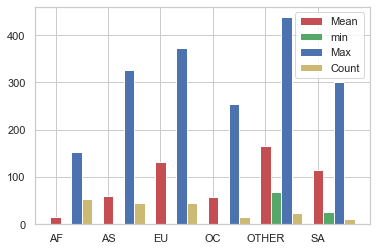

<Figure size 1440x1440 with 0 Axes>

In [144]:
mins = result['min'].tolist()
maxs = result['max'].tolist()
counts = result['count'].tolist()
index = np.arange(num_groups)
bar_width = 0.2

rect1 = plt.bar(index,means,bar_width, color ='r', label = 'Mean')
rect2 = plt.bar(index+bar_width,mins,bar_width, color ='g', label = 'min')
rect3 = plt.bar(index+bar_width*2,maxs,bar_width, color ='b', label = 'Max')
rect4 = plt.bar(index+bar_width*3,counts,bar_width, color ='y', label = 'Count')


plt.xticks(index, result.index.tolist())

plt.legend()
plt.figure(figsize=(20,20)) 
plt.show()

- 대륙별 totla_litres_of_pure_alcohol 시각화

In [188]:
continents = continent_min.index.tolist()
continents_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continents_mean

NameError: name 'continent_min' is not defined

In [157]:
continents = continent_mean.index.tolist()
continents

['AF', 'AS', 'EU', 'OC', 'OTHER', 'SA']

In [158]:
continents.append('MEAN')
continents

['AF', 'AS', 'EU', 'OC', 'OTHER', 'SA', 'MEAN']

In [160]:
x_pos = np.arange(len(continents))
x_pos

array([0, 1, 2, 3, 4, 5, 6])

In [162]:
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
alcohol

[3.00754716981132,
 2.1704545454545454,
 8.617777777777777,
 3.3812500000000005,
 5.995652173913044,
 6.308333333333334,
 4.717098445595855]

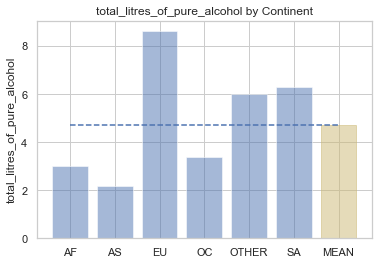

In [207]:
plt.grid(b=True, which='both', axis='both') #grid생성및 제거
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('y')
plt.plot([0., 6], [total_mean, total_mean], "--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

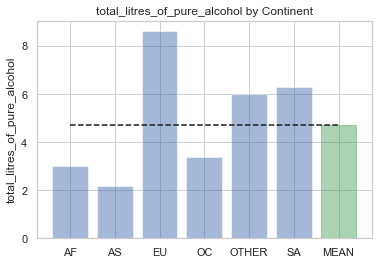

In [172]:
plt.grid(b=True, which='both', axis='both') #grid생성및 제거
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('g')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

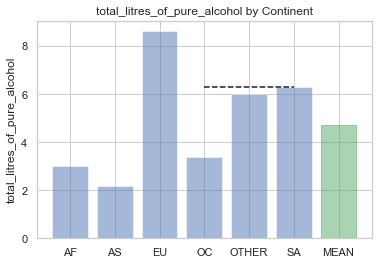

In [177]:
plt.grid(b=True, which='both', axis='both') #grid생성및 제거
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('g')
plt.plot([3,5], [continent_mean['SA'], continent_mean['SA']], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

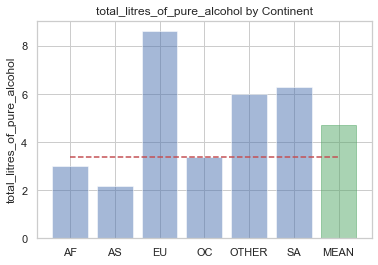

In [193]:
plt.grid(b=True, which='both', axis='both') #grid생성및 제거
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('g')
plt.plot([0,6], [continent_mean['OC'], continent_mean['OC']], "r--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

In [252]:
###################

In [253]:
! pip install scipy

In [257]:
africa = drinks.loc[drinks['continent'] == 'AF']
africa.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF


In [258]:
europe = drinks.loc[drinks['continent'] == 'EU']
europe.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


In [259]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [260]:
drinks['total_servings']= drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']

In [264]:
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol']/drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

In [265]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495


In [266]:
country_rank = drinks[['country','alcohol_rate']]
country_rank = country_rank.sort_values(by=['alcohol_rate'],ascending=0)
country_rank.head()

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


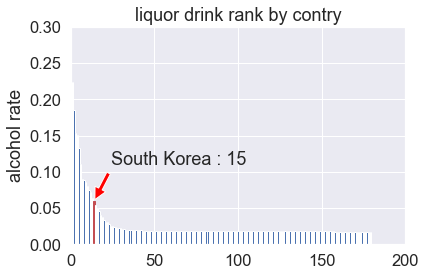

In [267]:
country_list = country_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_rank[country_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

- total_litre_of_pure_alcohol 평균을 구하기
- 아 평균값보다 적은 알코올을 섭취하는 대륙중에서 spirit을 가장 많이 마시는 국가를 구해보자.

In [29]:
continent_mean_total = drinks.total_litres_of_pure_alcohol.mean()
continent_mean_total

4.717098445595855

In [30]:
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continent_mean


continent
AF       3.007547
AS       2.170455
EU       8.617778
OC       3.381250
OTHER    5.995652
SA       6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [ ]:
###############

In [31]:
continent_under_mean = continent_mean[continent_mean <= continent_mean_total]
print(continent_under_mean)

continent
AF    3.007547
AS    2.170455
OC    3.381250
Name: total_litres_of_pure_alcohol, dtype: float64


In [33]:
continent_under_mean = continent_mean[continent_mean <= continent_mean_total].index.tolist()
continent_under_mean

['AF', 'AS', 'OC']

In [ ]:
####  A[A.column_name.isin(B)]
- A데이터 프레임에서 A column_name 피처가 B안에 포함되어 있는 데이터만 가져옴

In [43]:
df_continent_under_mean = drinks.loc[drinks.continent.isin(continent_under_mean)]
df_continent_under_mean

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
8,Australia,261,72,212,10.4,OC
12,Bahrain,42,63,7,2.0,AS
...,...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9,OC
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [44]:
under_continent_index = continent_under_mean.index
under_continent_index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [45]:
drinks['list_country'] = drinks['continent'].isin(less_continent_index) 

NameError: name 'less_continent_index' is not defined

In [46]:
most_spirit_under_mean = df_continent_under_mean.loc[df_continent_under_mean['spirit_servings'].idxmax()]
most_spirit_under_mean

country                         Russian Federation
beer_servings                                  247
spirit_servings                                326
wine_servings                                   73
total_litres_of_pure_alcohol                  11.5
continent                                       AS
Name: 141, dtype: object

In [47]:
most_spirit_under_mean ['country']

'Russian Federation'

In [1]:
less_country = drinks.loc[drinks['list_country'] == True]
less_country

max_spirit = drinks.country[drinks['spirit_servings'] == less_country['spirit_servings'].max()]
max_spirit


# continent_less_mean = continent_mean[continent_mean <= continent_mean_total]
# print(continent_less_mean)

# continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
# continent_mean

NameError: name 'drinks' is not defined